# Clustering in one dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functions import gen_domains, plot_domains, plot_KMeans1D, plot_GMM1D

This is an introduction to two approaches to data clustering: $k$-means clustering and the Gaussian mixture model (GMM).
Examples here are shown using one-dimensional data, to get some basic concepts across before introducing the complications involved in higher-dimensional data clustering.

## Example 1: an image with distinct domains
* Simulated image which could be _e.g._ surface potential data from a sample with three types of material
* Histogram shows that there are three distinct levels of contrast with no great overlap

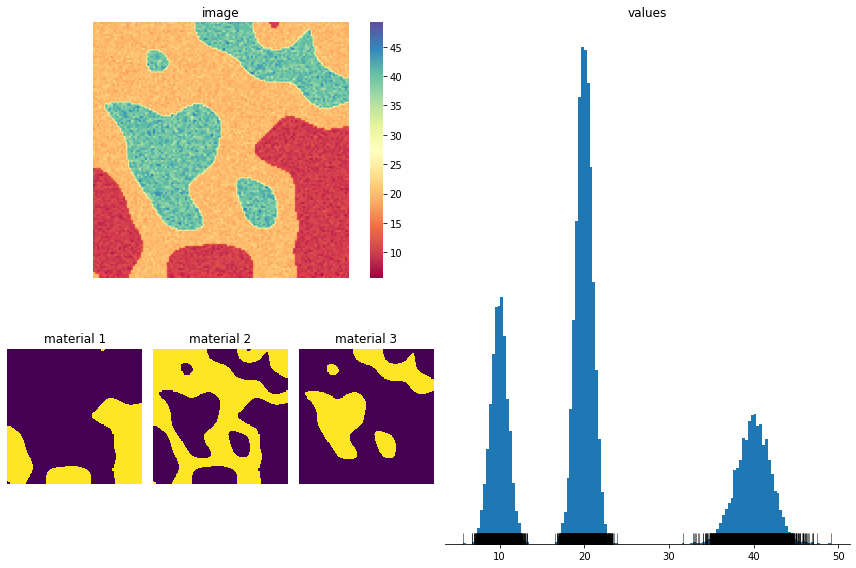

In [2]:
distinct_image, distinct_materials = gen_domains(populations=(1, 2, 1), means=(10, 20, 40), stds=(1, 1, 2))
plot_domains(distinct_image, distinct_materials);

### $k$-means clustering
* Puts a number, $k$, of centroids into the same space as the data
* Points are assigned to a cluster according to the closest centroid
* Centroids must be at the mean position of all points in one cluster (hence the name $k$-means)
* The positions of the centroids are chosen to minimize the variance of each cluster (sum of squared deviations from the mean)
* Here there are 3 materials, so we choose $k=3$:
  * Images show the cluster determined
  * Vertical lines show the centroid position

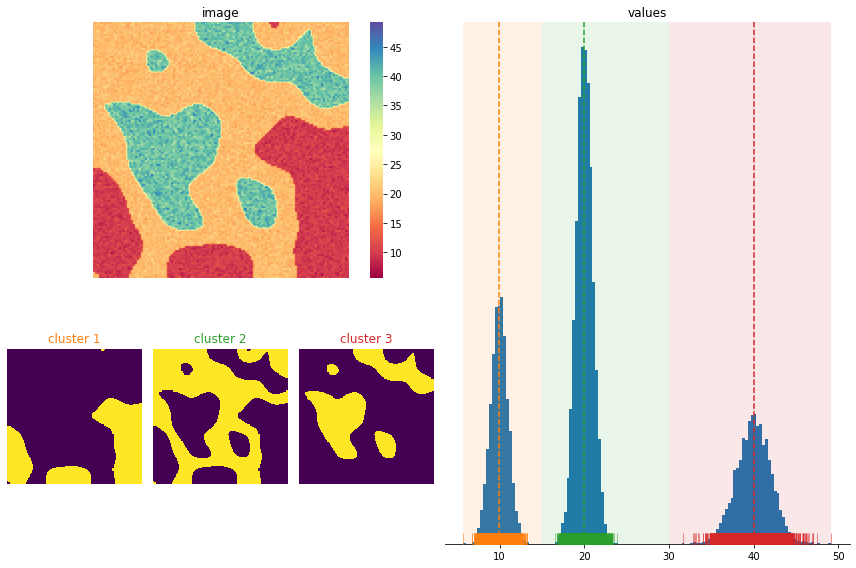

In [3]:
_, kmeans_distinct = plot_KMeans1D(distinct_image, k=3);

### Gaussian mixture model (GMM) clustering
* Assumes the data is drawn from a number, $k$, of Gaussian distributions
* Uses expectation maximisation (EM) to find the parameters of the $k$ Gaussians that best describe the data:
  * Parameters are the mean, variance ($=\sigma^2$), and weighting ($\propto$ peak area)
  * _EM is not the same as fitting to the histogram_ (but converges to similar values)
* Unlike $k$-means, GMM is not exclusively discrete:
  * The relative height of each Gaussian gives the probability that an observation falls in each cluster
* Here there are 3 materials, so we choose $k=3$:
  * Images show the _probability_ each point is in a cluster
  * Dashed lines show the individual Gaussian components

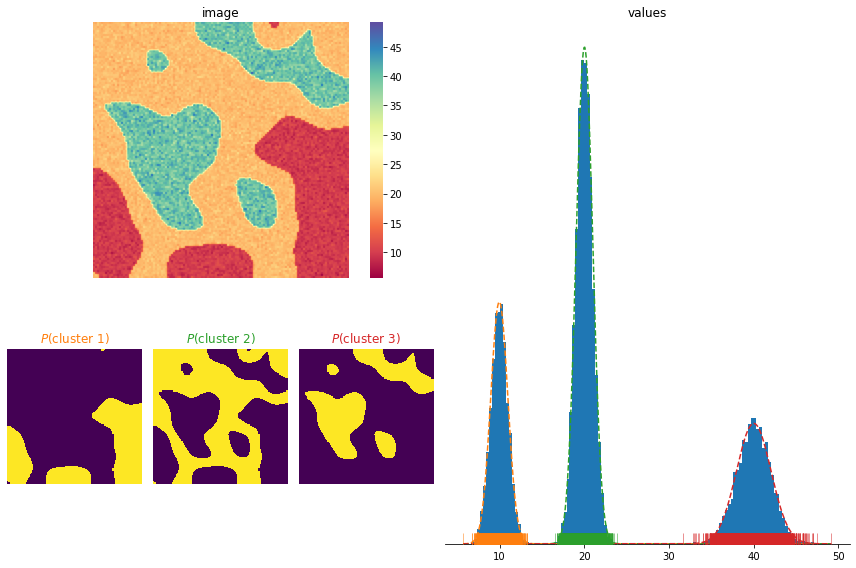

In [4]:
_, GMM_distinct = plot_GMM1D(distinct_image, k=3);

## Example 2: an image with fuzzy domains
* Real world measured values often have a variance comparable to their contrast
* _E.g._ in this image, we can see different materials because similar values are grouped into domains
* But the noise in each domain means they're not clear from the distribution of values alone
* Different algorithms cope differently with overlapping clusters

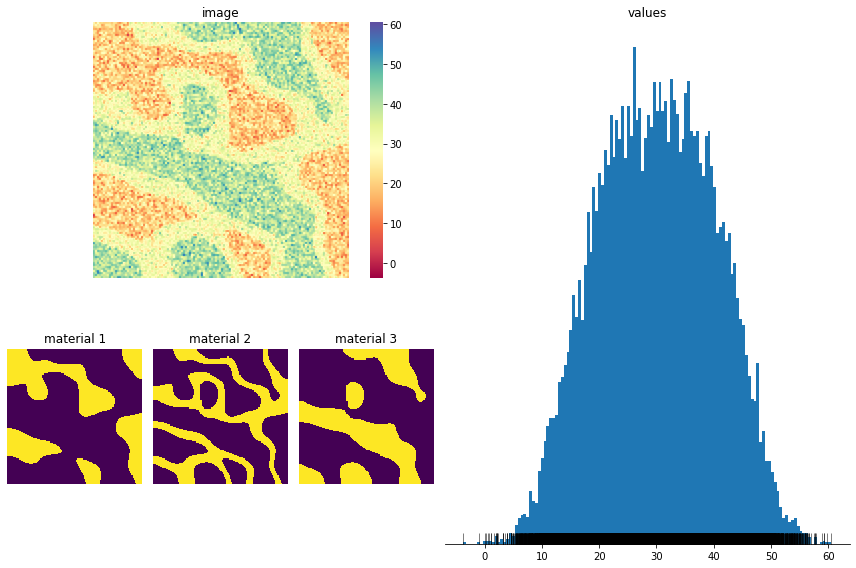

In [5]:
muddled_image, muddled_materials = gen_domains(populations=(1, 1, 1), means=(20, 30, 40), stds=(6, 6, 6))
plot_domains(muddled_image, muddled_materials);

### $k$-means clustering
* Ignores overlap between clusters
* Values close to the boundary between clusters are just assigned to the nearest centroid
* Many points are assigned incorectly

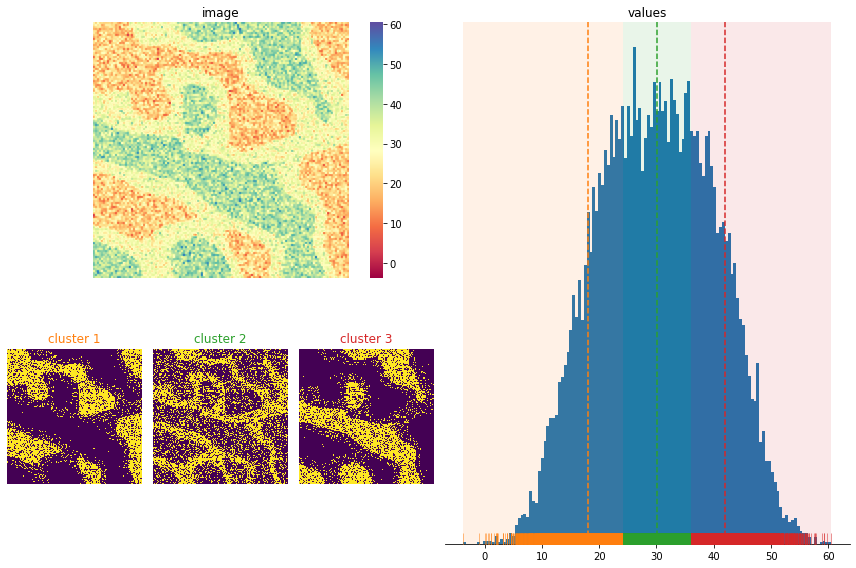

In [6]:
_, kmeans_muddled = plot_KMeans1D(muddled_image, k=3);

### GMM clustering
* Explicitly accounts for overlap
* Still susceptible to the same uncertainty
* But this is reflected by a lower probability in the overlap regions

In [ ]:
_, GMM_muddled = plot_GMM1D(muddled_image, k=3);

## Example 3: enclosed domains
* Different algorithms also cope differently with different topologies of clusters
* In this image there are two domains, both centred on 0, but one has a much higher variance
* The histogram shows that one domain is 'inside' the other

In [ ]:
enclosed_image, enclosed_materials = gen_domains(populations=(1, 1), means=(0, 0), stds=(1, 20))
plot_domains(enclosed_image, enclosed_materials);

### $k$-means clustering
* Clusters cannot have gaps
* So points far above and below the central peak are incorrectly assigned to different clusters

In [ ]:
_, kmeans_enclosed = plot_KMeans1D(enclosed_image, k=2);

### GMM clustering
* Allows for nested clusters
* Points both above and below the central peak are assigned to the same wide cluster

In [ ]:
_, GMM_enclosed = plot_GMM1D(enclosed_image, k=2, means_init=np.zeros([2, 1]));

## Take away
* Neither GMM or $k$-means are 'better' than the other, but they are suited to different tasks
* There are loads and loads more clustering algorithms